In [1]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd

sys.path.append('../src')

from preprocess import filter_users

In [2]:
# Path to folder with yelp_academic_dataset_review.json
INPUT_DATA_PATH = '/home/data/recsys/yelp/'

In [3]:
%%time
df = pd.read_json(os.path.join(INPUT_DATA_PATH, 'yelp_academic_dataset_review.json'),  lines=True)
print(df.shape)
df.head()

(6990280, 9)
CPU times: user 1min 23s, sys: 32.7 s, total: 1min 56s
Wall time: 2min 26s


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [4]:
df = df[['user_id', 'business_id', 'date']]
df = df.rename(columns={'business_id': 'item_id'})

In [5]:
df.user_id.nunique(), df.item_id.nunique()

(1987929, 150346)

In [6]:
df.groupby('user_id').size().describe()

count    1.987929e+06
mean     3.516363e+00
std      1.277088e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      3.048000e+03
dtype: float64

In [7]:
df.groupby('item_id').size().describe()

count    150346.000000
mean         46.494619
std         124.519061
min           5.000000
25%           8.000000
50%          15.000000
75%          38.000000
max        7673.000000
dtype: float64

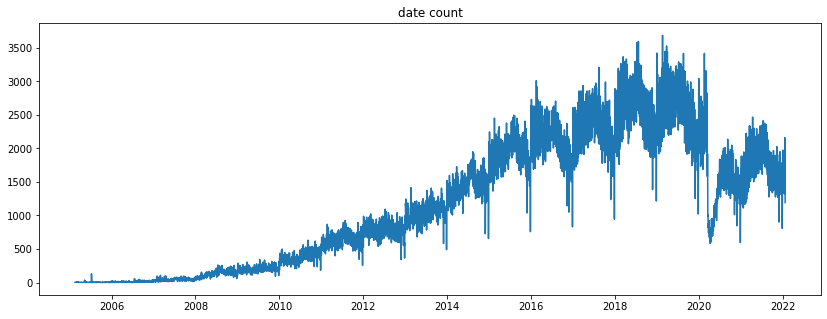

In [8]:
df.date.dt.date.value_counts().sort_index().plot(figsize=(14, 5), title='date count')
plt.show()

In [9]:
df = filter_users(df, user_min_count=5)

Filtering users..
Number of users before 1987929
Number of users after 279106
Interactions length before: 6990280
Interactions length after: 4350510


In [10]:
df.groupby('user_id').size().describe()

count    279106.000000
mean         15.587304
std          31.419786
min           5.000000
25%           6.000000
50%           8.000000
75%          14.000000
max        3048.000000
dtype: float64

In [11]:
df.groupby('item_id').size().describe()

count    148415.000000
mean         29.313142
std          75.260364
min           1.000000
25%           5.000000
50%           9.000000
75%          24.000000
max        4087.000000
dtype: float64

In [12]:
%%time
df = df.sort_values(['user_id', 'date'])

CPU times: user 11.4 s, sys: 977 ms, total: 12.4 s
Wall time: 12.4 s


In [13]:
%%time
df.user_id = df.user_id.astype('category').cat.codes + 1
df.item_id = df.item_id.astype('category').cat.codes + 1

CPU times: user 6.89 s, sys: 598 ms, total: 7.49 s
Wall time: 7.49 s


In [21]:
%%time
df[['user_id', 'item_id']].to_csv('../data/yelp.txt', sep=' ', index=False, header=None)

CPU times: user 3.96 s, sys: 116 ms, total: 4.08 s
Wall time: 4.08 s
